# N dimensional Plane

Este es un problema de regresión donde se cogen puntos de un plano en n dimensiones y se le añade un cierto porcentaje de ruido. La red neuronal debe ser capaz de predecir bien los valores de puntos que se asemejan a este plano

(En el ejemplo aquí expuesto se han creado 1000 puntos en dimensión 15 y con nivel de ruido 30%, si se modifican estos valores es probable que se deben cambiar los hiperparámetros de la red neuronal para obtener mejores resultados)

Los valores de los hiperparámetros con los que tuve buenos resultados son:
- Optimizador: SGD
- Learning rate: 0.000006
- Epochs : 7000
- Función de Activación : Relu y Tangente Hiperbólica
- Capas de la Red : 3
- Neuronas de cada capa : 15 (o n características), 20, 10 y 1

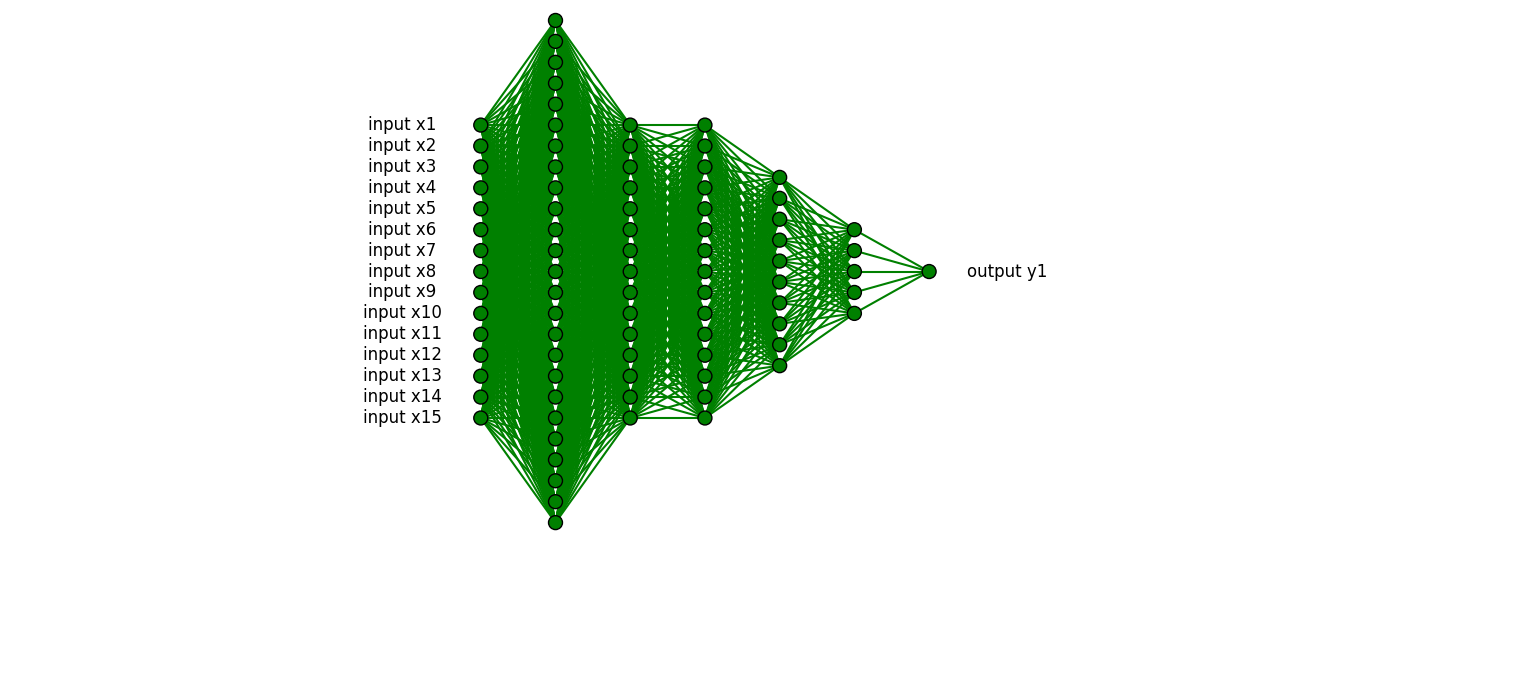

In [29]:
import numpy as np
from main.neural_network import train, predict
from main.nn_components.draw_nn import draw_nn
from main.nn_components.network_layer import FullyConnectedLayer
from main.nn_components.activations_functions import Relu, Tanh
from main.nn_components.loss_functions import mse, mse_derivative
from sklearn.model_selection import train_test_split
from main.nn_components.graphic_regression import dispersion_graph, residual_errors_graph, learning_curve

n_points = 1000
n_dimensions = 15
noise_level = 0.3


np.random.seed(42)
X = np.random.rand(n_points, n_dimensions) * 10
coefficients = np.random.rand(n_dimensions)
Y = X.dot(coefficients)

Y_noisy = Y + noise_level * np.random.randn(n_points)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_noisy, test_size=0.2, random_state=42)


X_train = np.reshape(X_train, (800, n_dimensions, 1))
X_test = np.reshape(X_test, (200, n_dimensions, 1))
Y_train = np.reshape(Y_train, (800, 1))
Y_test = np.reshape(Y_test, (200, 1))

nn = [
    FullyConnectedLayer(n_dimensions, 25),
    Relu(),
    FullyConnectedLayer(25, 15),
    Relu(),
    FullyConnectedLayer(15, 15),
    Relu(),
    FullyConnectedLayer(15, 10),
    Relu(),
    FullyConnectedLayer(10, 5),
    Relu(),
    FullyConnectedLayer(5, 1)
]

draw_nn(nn)

In [30]:
train_loss = train(nn, mse, mse_derivative, X_train, Y_train, epochs=10000, learning_rate=0.0000001, optim='sgd')

y_pred = []
for X, y in zip(X_test, Y_test):
    output = predict(nn, X)
    y_pred.append(output[0][0])
    print(f'Pred: {output[0][0]}, Actual: {y[0]}')

Final Loss = 0.3079600015298249
Pred: 28.448823046139452, Actual: 29.06334105894873
Pred: 33.93376454639005, Actual: 34.34821974311675
Pred: 29.968829386279154, Actual: 29.903152558966948
Pred: 19.874367130605787, Actual: 18.66553592810757
Pred: 25.70566387900709, Actual: 25.14809530850024
Pred: 29.073175729345962, Actual: 28.396525070032894
Pred: 29.3728532666595, Actual: 29.591799824306538
Pred: 38.980096732828734, Actual: 38.94118808400716
Pred: 31.096417054460584, Actual: 29.882332205137867
Pred: 36.63082099590992, Actual: 36.07991382267388
Pred: 34.257559124562874, Actual: 34.107416012905155
Pred: 42.02645084003159, Actual: 42.71041907208916
Pred: 28.75324899151302, Actual: 29.575404611333983
Pred: 40.708162451062584, Actual: 40.27732389500788
Pred: 27.12346607718556, Actual: 26.86376103109527
Pred: 31.557939557345904, Actual: 31.890620371262973
Pred: 27.354419240171453, Actual: 26.952253503794626
Pred: 20.464416979566955, Actual: 20.771540938364048
Pred: 35.5625419587306, Actual:

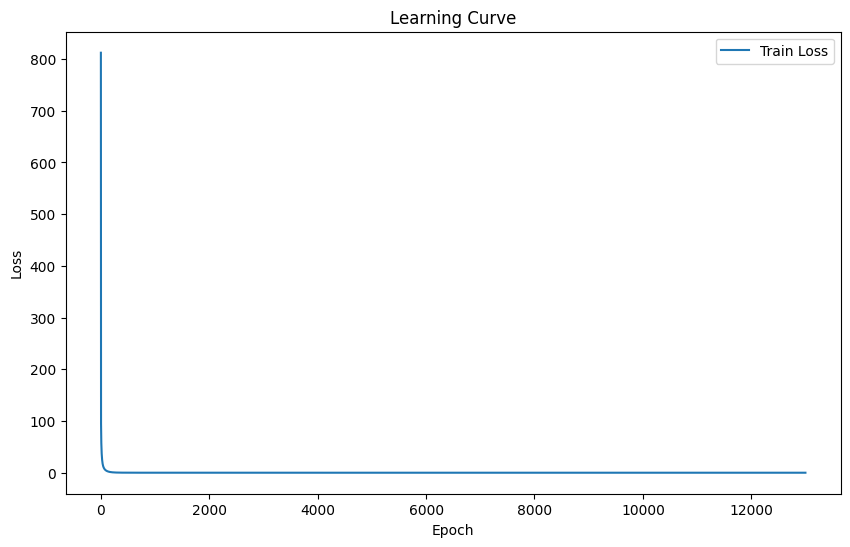

In [3]:
learning_curve(train_loss)

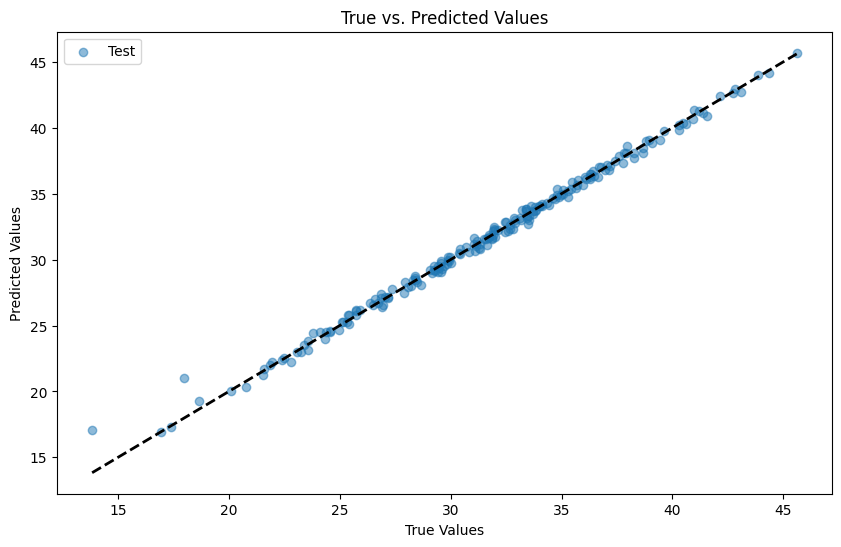

In [4]:
dispersion_graph(Y_test, y_pred)

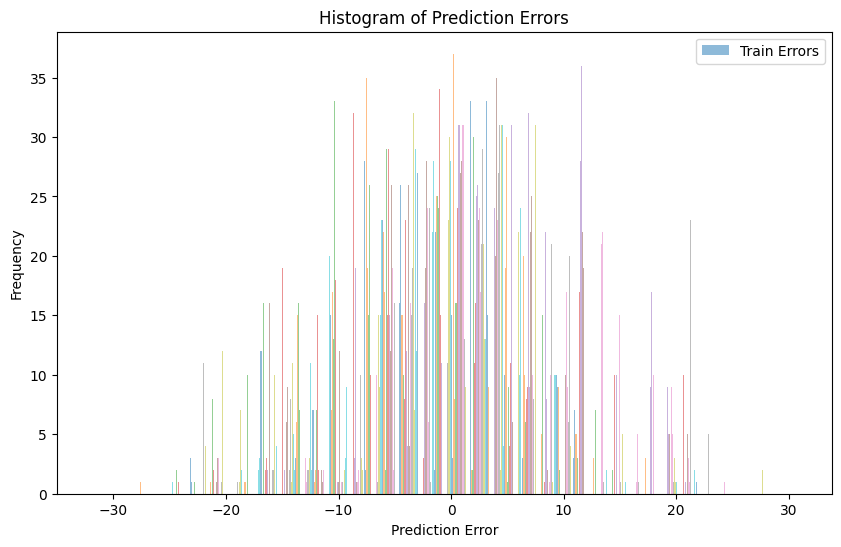